## Task Background
This dataset has provided a set of property sales in Melbourne City, Victoria, Australia. It includes details such as the suburb, address, number of rooms, property type, price, method of sale, and seller information, as well as information on the property's location and characteristics, such as distance from the city center, postcode, bedroom and bathroom count, car spaces, land size, building area, year built, council area, latitude and longitude, region name, and property count. The objective of this project is to perform exploratory data analysis, training, testing and evaluating a relevant mode

## Exploratory Data Analysis(EDA)
## Data Cleaning process

The lines of code below are there to understand the data below and impute missing values.

In [5]:
# import pandas
import pandas as pd

# Created a file path
file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Created a variable for file path 'data' and pulled out it's top rows
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [17]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [1]:
import pandas as pd

file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Load the data
data = pd.read_csv(file_path)

# Remove all rows with null values
data_cleaned = data.dropna()

# Check if there are still any null values in the dataset
print(data_cleaned.isnull().sum())

Unnamed: 0       0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


## Pre-processing the dataset
This includes encoding

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Load the data
data = pd.read_csv(file_path)

# Identifying and handling missing values (e.g., 9999, empty strings)
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Imputes missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Imputes missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname', 'Suburb']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

# Removes rows with remaining missing values
data_cleaned = data.dropna()

# Alternatively, if you prefer using pandas get_dummies (simpler approach)
suburb_encoded_df = pd.get_dummies(data_cleaned['Suburb'], prefix='Suburb')

# Replace the original 'Suburb' column with the encoded values (if needed)
data_cleaned = pd.concat([data_cleaned, suburb_encoded_df], axis=1).drop(columns=['Suburb'])

C:\Users\Alka\AppData\Local\Temp\ipykernel_4632\2544421226.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Alka\AppData\Local\Temp\ipykernel_4632\2544421226.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# File path
file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Load the data
data = pd.read_csv(file_path)

# Replace invalid or missing values
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Impute missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Impute missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Date', 'Type', 'Address']
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

# Ensure all categorical columns are of string type
for col in categorical_cols:
    data[col] = data[col].astype(str)

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid collinearity
encoded_columns = one_hot_encoder.fit_transform(data[categorical_cols])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(
    encoded_columns,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols),
    index=data.index  # Align with the original DataFrame index
)

# Concatenate the encoded columns with the original data
data_encoded = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data_encoded.drop(columns=categorical_cols, inplace=True)

In [39]:
categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Date', 'Type', 'Address', 'Suburb']
# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_columns = one_hot_encoder.fit_transform(data_cleaned[categorical_cols])

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' for k-1 encoding
council_encoded = one_hot_encoder.fit_transform(data_cleaned[['CouncilArea']])

# Create a DataFrame for encoded features
council_encoded_df = pd.DataFrame(
    council_encoded,
    columns=one_hot_encoder.get_feature_names_out(['CouncilArea']),
    index=data_cleaned.index
)

# Concatenate with the original dataset
data_encoded = pd.concat([data_cleaned, council_encoded_df], axis=1)

# Drop the original column
data_encoded.drop(columns=['CouncilArea'], inplace=True)

In [30]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = one_hot_encoder.fit_transform(data[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_columns,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols),
    index=data.index
)

# Concatenate and drop original columns
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.drop(columns=categorical_cols, inplace=True)


## Graphs ##

C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\2132234927.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\2132234927.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

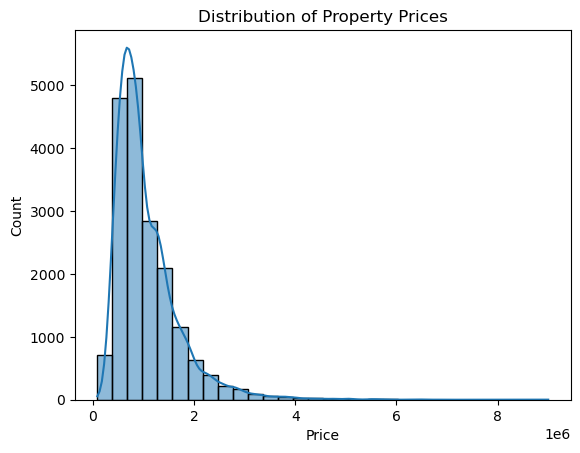

Skewness of 'Price': 2.37
The 'Price' distribution is highly positively skewed (right skewed).


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Set variable for the file path
data = pd.read_csv(file_path)

# Identifies and handles missing values (e.g., 9999, empty strings)
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Imputes missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Imputes missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

# Removes rows with remaining missing values
data_cleaned = data.dropna()

# Removes columns with missing values
data_cleaned = data.dropna(axis=1)
sns.histplot(data_cleaned['Price'], kde=True, bins=30)
plt.title('Distribution of Property Prices')
plt.show()

# Checks skewness of the 'Price' column
price_skewness = data_cleaned['Price'].skew()
print(f"Skewness of 'Price': {price_skewness:.2f}")

# Interpretation of skewness
if price_skewness > 1:
    print("The 'Price' distribution is highly positively skewed (right skewed).")
elif price_skewness < -1:
    print("The 'Price' distribution is highly negatively skewed (left skewed).")
elif 0.5 < price_skewness <= 1:
    print("The 'Price' distribution is moderately positively skewed (right skewed).")
elif -1 <= price_skewness < -0.5:
    print("The 'Price' distribution is moderately negatively skewed (left skewed).")
else:
    print("The 'Price' distribution is approximately symmetric.")

C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\2920508115.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\2920508115.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

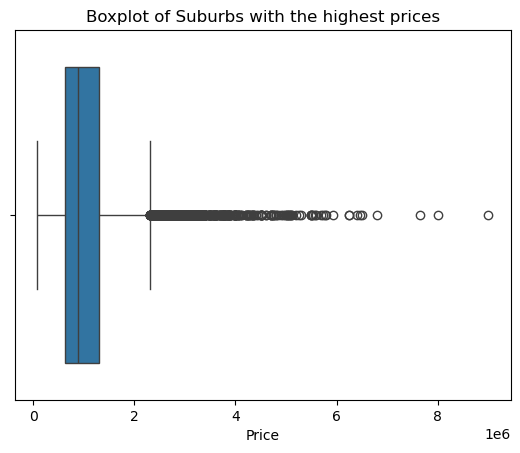

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Loads the data
data = pd.read_csv(file_path)

# Identifying and handling missing values (e.g., 9999, empty strings)
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Imputing missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Imputing missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

# Removing rows with remaining missing values
data_cleaned = data.dropna()

# Removing columns with missing values
data_cleaned = data.dropna(axis=1)
sns.boxplot(x=data_cleaned['Price'])
plt.title('Boxplot of Suburbs with the highest prices')
plt.show()

In [5]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
print(data_cleaned['Price'].describe())

count     18396
mean    1056697
std      641922
min       85000
25%      633000
50%      880000
75%     1302000
max     9000000
Name: Price, dtype: float64


## Analysing Relationships between the factors
 **I have produced a Heatmap and several graphs for comparing the correlation between "Price" and other dependent variables(including numerical and categorical).**

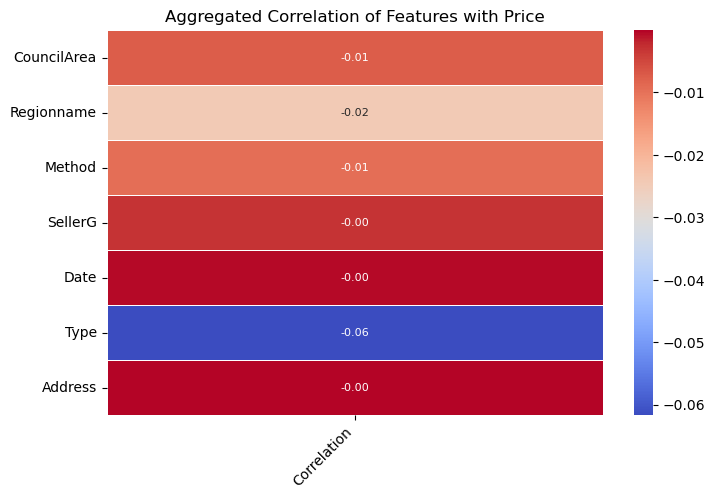

In [50]:
# Aggregate correlations by original categorical column
original_categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Date', 'Type', 'Address']  # List of original columns
aggregated_correlation = {}

for col in original_categorical_cols:
    matching_cols = [c for c in encoded_df.columns if col in c]
    aggregated_correlation[col] = correlations[matching_cols].mean()

# Converts to a DataFrame
aggregated_correlation_df = pd.DataFrame(
    aggregated_correlation.values(), 
    index=aggregated_correlation.keys(), 
    columns=['Correlation']
)

# Visualises the aggregated heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    aggregated_correlation_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}  # Adjust annotation font size
)
plt.title("Aggregated Correlation of Features with Price")
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\3865776883.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Alka\AppData\Local\Temp\ipykernel_12716\3865776883.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

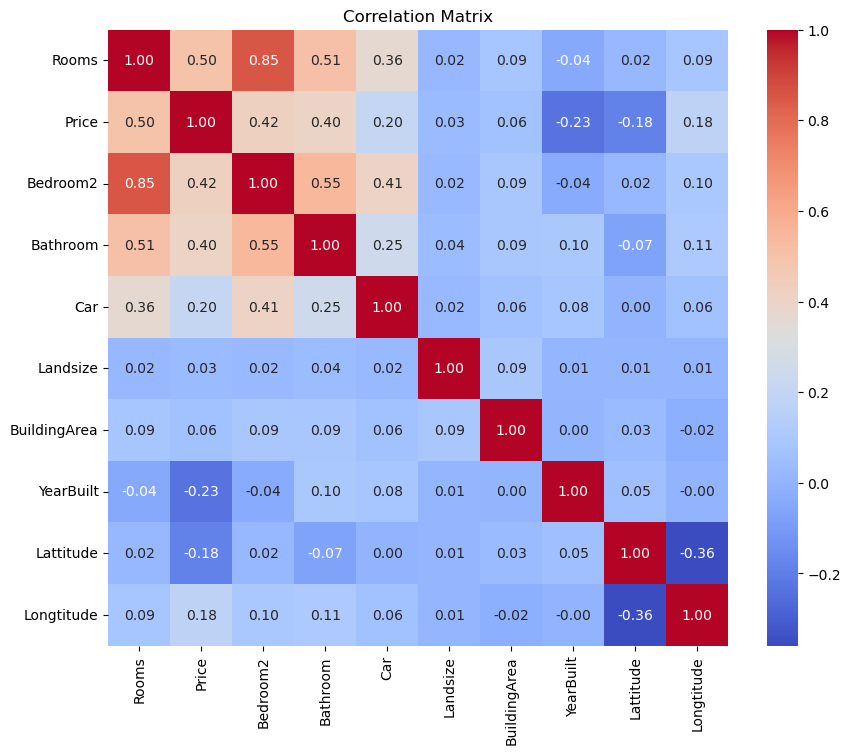

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'

# Loads the data
data = pd.read_csv(file_path)

# Identifying and handling missing values (e.g., 9999, empty strings)
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Imputing missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Imputingg missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Date', 'Type', 'Address']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

# Removing rows with remaining missing values
data_cleaned = data.dropna()

# Removing columns with missing values
data_cleaned = data.dropna(axis=1)

numerical_cols = data_cleaned.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

No multi-collinearity for price against numerical and categorical variables as the correlations aren't strongly correlated and don't have a correlation of 1 or -1.

## Training and Testing model ##
- Random forest regressor
- Feature Importance plot

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Loads the dataset
file_path = r'C:\Users\Alka\Downloads\Property Sales of Melbourne City.csv'
data = pd.read_csv(file_path)

# Step 1: Handling missing or unexpected values
data.replace([9999, '', 'NA', 'N/A'], np.nan, inplace=True)

# Ensures 'Price' is numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Imputing missing values for numerical columns
numerical_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Price']
for col in numerical_cols:
    if col in data.columns:  # Ensure the column exists
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
        data[col].fillna(data[col].median(), inplace=True)  # Fill missing with median

# Imputing missing values for categorical columns
categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Date', 'Type', 'Address', 'Suburb']
for col in categorical_cols:
    if col in data.columns:  # Ensure the column exists
        data[col] = data[col].astype(str).fillna('Unknown')  # Fill missing with 'Unknown'

# Step 2: One-hot encoding with minimal memory usage
selected_categorical_cols = ['CouncilArea', 'Regionname', 'Method', 'SellerG', 'Type']  # Drop high-cardinality columns like 'Address'
one_hot_encoder = OneHotEncoder(sparse_output=True, drop='first')  # Use sparse matrix for efficiency
encoded_sparse_output = one_hot_encoder.fit_transform(data[selected_categorical_cols])

# Combine sparse one-hot encoding with numerical columns
numerical_data = data[numerical_cols].drop(columns=['Price'], errors='ignore')  # Exclude 'Price'
X_sparse = pd.DataFrame.sparse.from_spmatrix(encoded_sparse_output, columns=one_hot_encoder.get_feature_names_out(selected_categorical_cols))
X = pd.concat([numerical_data.reset_index(drop=True), X_sparse.reset_index(drop=True)], axis=1)

# Defines target variable
y = data['Price']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Finding best parameters and modelling them
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 5: Train the model with best parameters
best_rf_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

# Step 6: Evaluates the model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Calculating the percentage of MSE relative to the mean of the target variable
percentage_mse = (mse / np.mean(y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse:.2f}")
print(f"Test Percentage of MSE relative to mean Price: {percentage_mse:.2f}%")
print(f"Test R² Score: {r2:.2f}")



C:\Users\Alka\AppData\Local\Temp\ipykernel_3024\566030390.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Fill missing with median


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Alka\anaconda3\Lib\site-pa

Test Mean Squared Error: 112801770692.99
Test Percentage of MSE relative to mean Price: 10642739.56%
Test R² Score: 0.72


The r-squared value of random forest regressor is 0.72 which shows that with hyper parameter tuning that the training model perfectly adjusts well to the test data and it can effectively predict the trend of real estate sales data(price) against features such as rooms, landsize, car spaces and more.

C:\Users\Alka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


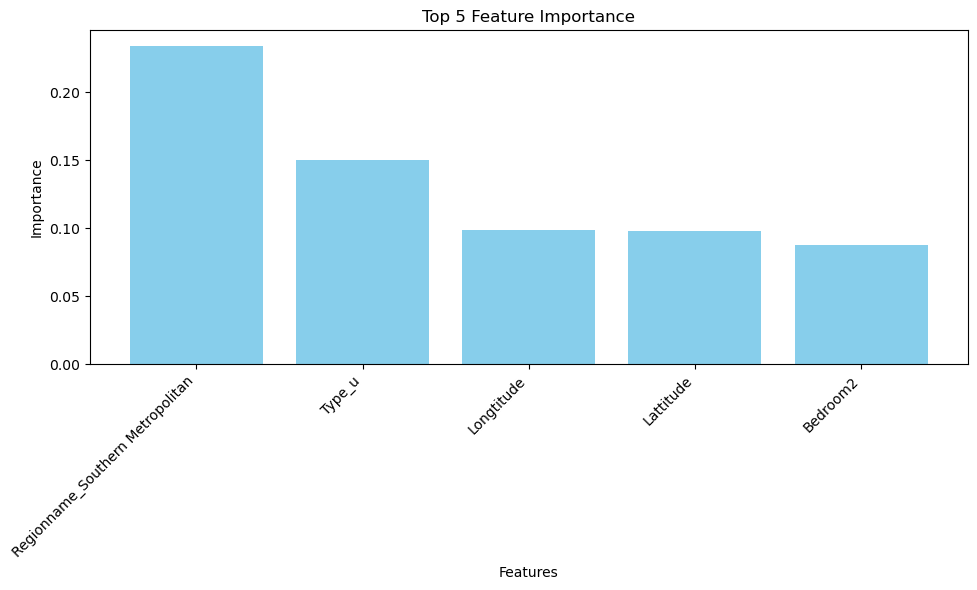

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Using a RandomForestRegressor library to fit in the training data variables for predictions
model = RandomForestRegressor()
model.fit(X_train, y_train) 

# Extracting feature importance
importances = model.feature_importances_
features = X_train.columns  # Feature names
indices = np.argsort(importances)[::-1]  # Sort features by importance in descending order

# Select top 5 features
top_n = 5
top_indices = indices[:top_n]
top_features = features[top_indices]
top_importances = importances[top_indices]

# Plot feature importance for top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='skyblue')
plt.title("Top 5 Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The feature importance plot above shows that the region contributes the most to influencing property prices within Melbourne over property type, latitude and logitude while, the number of bedrooms while have the least influence over property prices.